<a href="https://colab.research.google.com/github/rajatgermany/stackexchange/blob/master/zillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents




1.   Introduction
2.   Data Overview

1.   Data cleaning
2.   EDA









In [1]:

from google.colab import drive 
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [0]:
df_train =pd.read_csv('gdrive/My Drive/Colab Notebooks/dataexploration/zillow/zillow/train_2017.csv')
df_props =pd.read_csv('gdrive/My Drive/Colab Notebooks/dataexploration/zillow/zillow/properties_2017.csv')

In [0]:
df_train.info()

In [0]:
df_props.head()

In [0]:
df_merged = pd.merge(df_train, df_props, how='left', on= 'parcelid')
df_merged.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

In [0]:
df_merged.shape

(77613, 60)

In [0]:
df_merged.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


# **Missing Values**

In [0]:
missing_values = df_merged.isnull().sum().sort_values(ascending = False)

In [0]:
missing_values_percentage = (missing_values /df_train.shape[0]) * 100

In [0]:
df_missing_values = pd.concat([missing_values, missing_values_percentage], axis = 1)
df_missing_values.columns = ['value', 'percentage']


In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

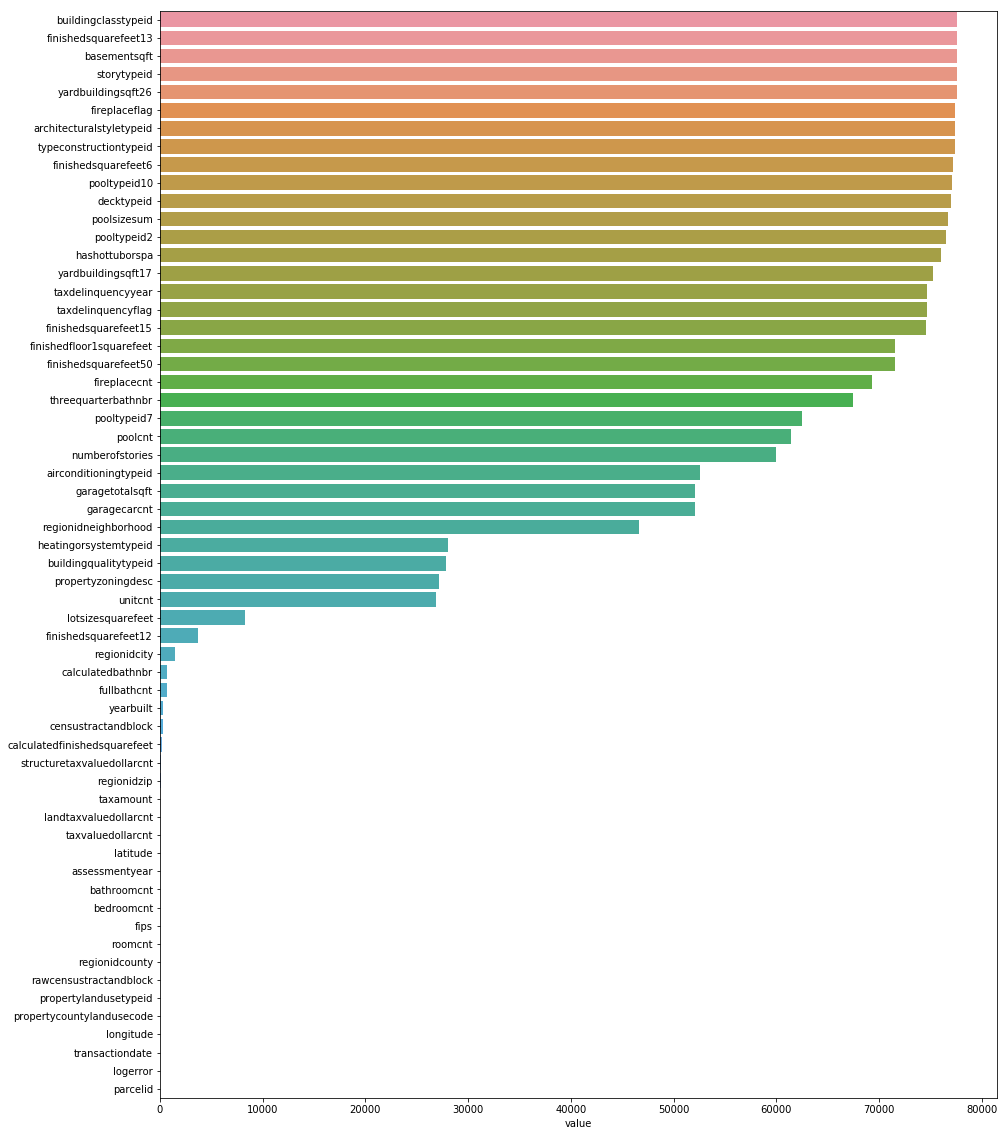

In [0]:
fig, ax = plt.subplots(1, 1, figsize = (15,20))
sns.barplot(df_missing_values.value, df_missing_values.index, ax = ax )

In [0]:
features_to_consider = list(df_missing_values[df_missing_values.percentage < 80].index)

In [0]:
df_with_valid_features = df_merged[features_to_consider]

In [0]:
df_with_valid_features.isnull().sum()

In [0]:
def fill_missing_values(x):
  if not df_with_valid_features[x].isnull().any() :
    return
  if df_with_valid_features[x].dtype == 'object'  :
    df_with_valid_features[x].fillna(df_with_valid_features[x].mode()[0], inplace = True)   
  else:
    df_with_valid_features[x].fillna(df_with_valid_features[x].mean(), inplace = True)     
 
df_with_valid_features.columns.map(fill_missing_values)

Index([None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None],
      dtype='object')

In [0]:
months_map = {1: 'Jan', 2: 'Feb', 3: "Mar", 4: "Apr", 5: "May", 6: "June", 
              7: "July", 8: "Aug", 9: "Sept", 10: "Oct", 11: "Nov", 12: "Dec" }

df_with_valid_features['transactiondate'] = pd.to_datetime(df_with_valid_features['transactiondate'], format='%Y-%m-%d')
df_with_valid_features['day'] = df_with_valid_features['transactiondate'].dt.day
df_with_valid_features['month'] = df_with_valid_features['transactiondate'].dt.month
df_with_valid_features['month'].value_counts()

6    11456
5    10487
8     9936
7     9490
3     9327
4     8679
1     7025
2     6412
9     4801
Name: month, dtype: int64

# Univariate Analysis

In [0]:
df_with_valid_features['buckets'] = pd.cut(df_with_valid_features.logerror, 5)


## Target Variable

###Checking Distribution

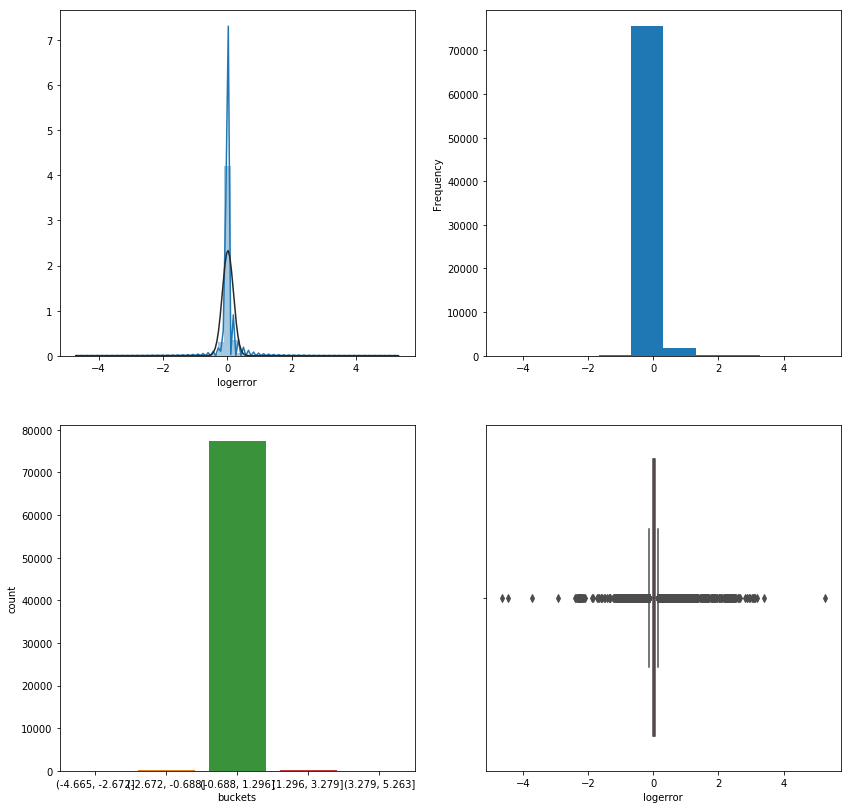

In [0]:
from scipy.stats import norm
fig, ax = plt.subplots(2,2, figsize=(14, 14))
sns.distplot(df_with_valid_features.logerror, fit = norm, ax = ax[0][0])
df_with_valid_features.logerror.plot('hist',  ax = ax[0][1])
sns.boxplot(df_with_valid_features.logerror, ax = ax[1][1], color='red')
sns.countplot(df_with_valid_features.buckets, ax = ax[1][0])

**`Clearly we have outlier for the log error. As the distribution matches the normal distribution this clearly suggests the probability of extereme of values are close to 0.005 **

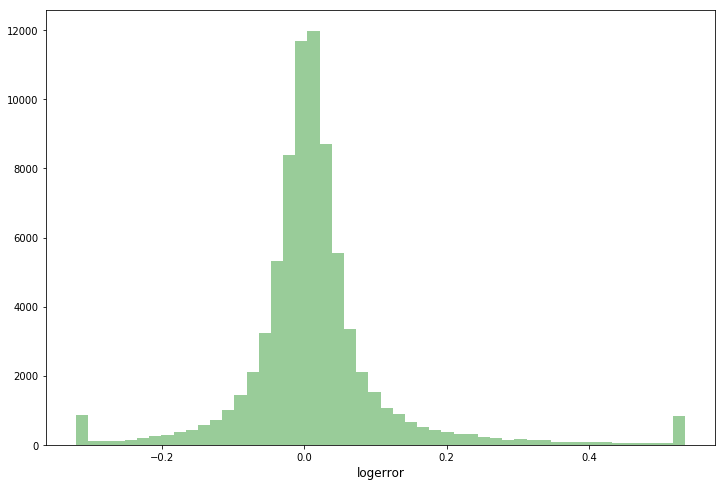

In [0]:
ulimit = np.percentile(df_with_valid_features.logerror.values, 99)
llimit = np.percentile(df_with_valid_features.logerror.values, 1)
df_with_valid_features['logerror'].ix[df_with_valid_features['logerror']>ulimit] = ulimit
df_with_valid_features['logerror'].ix[df_with_valid_features['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(df_with_valid_features.logerror.values, bins=50, kde=False, color = 'green')
plt.xlabel('logerror', fontsize=12)
plt.show()

### TimeSeries Analysis

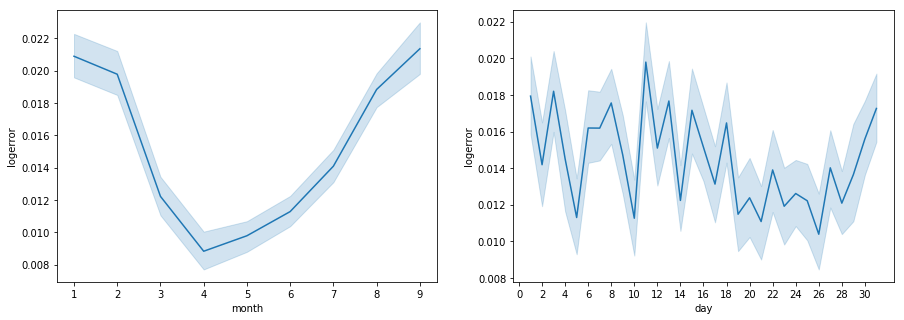

In [0]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.lineplot('month', 'logerror', data = df_with_valid_features, ax = ax[0], ci=68)
sns.lineplot('day', 'logerror', data = df_with_valid_features, ax = ax[1], ci=68)
ax[1].set_xticks(np.arange(0, 32, 2))




### **Statistics**

In [0]:
 df_with_valid_features.logerror.describe()

count    77613.000000
mean         0.014427
std          0.105235
min         -0.319861
25%         -0.024325
50%          0.006670
75%          0.039295
max          0.534198
Name: logerror, dtype: float64

In [0]:
# Find the hypothesis test for checking the normality of the distribution or to say symetery of the test. Skewness and kurtosis measure the symetry of the distributon
skew = df_with_valid_features.logerror.skew()

In [0]:
Kurtosis = df_with_valid_features.logerror.kurtosis(d)

## Continous Variables

In [0]:
df_numeric = df_with_valid_features.select_dtypes(exclude='object')

In [0]:
df_numeric.columns

Index(['poolcnt', 'numberofstories', 'airconditioningtypeid',
       'garagetotalsqft', 'garagecarcnt', 'regionidneighborhood',
       'heatingorsystemtypeid', 'buildingqualitytypeid', 'unitcnt',
       'lotsizesquarefeet', 'finishedsquarefeet12', 'regionidcity',
       'calculatedbathnbr', 'fullbathcnt', 'yearbuilt', 'censustractandblock',
       'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt',
       'regionidzip', 'taxamount', 'landtaxvaluedollarcnt',
       'taxvaluedollarcnt', 'latitude', 'assessmentyear', 'bathroomcnt',
       'bedroomcnt', 'fips', 'roomcnt', 'regionidcounty',
       'rawcensustractandblock', 'propertylandusetypeid', 'longitude',
       'transactiondate', 'logerror', 'parcelid', 'day', 'month', 'buckets',
       'finishedsqaure12buckets'],
      dtype='object')

**Checking the corelation with the target variable**

In [0]:
corr = df_with_valid_features.corr()['logerror']
corr

poolcnt                              NaN
numberofstories                 0.004277
airconditioningtypeid           0.006519
garagetotalsqft                 0.020631
garagecarcnt                    0.016168
regionidneighborhood           -0.005514
heatingorsystemtypeid          -0.005057
buildingqualitytypeid          -0.011012
unitcnt                        -0.000607
lotsizesquarefeet               0.008806
finishedsquarefeet12            0.049621
regionidcity                   -0.003600
calculatedbathnbr               0.033346
fullbathcnt                     0.030747
yearbuilt                       0.005047
censustractandblock             0.007447
calculatedfinishedsquarefeet    0.045126
structuretaxvaluedollarcnt      0.009821
regionidzip                    -0.000282
taxamount                       0.004067
landtaxvaluedollarcnt           0.002385
taxvaluedollarcnt               0.005342
latitude                       -0.007376
assessmentyear                       NaN
bathroomcnt     

### finishedsquarefeet12

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

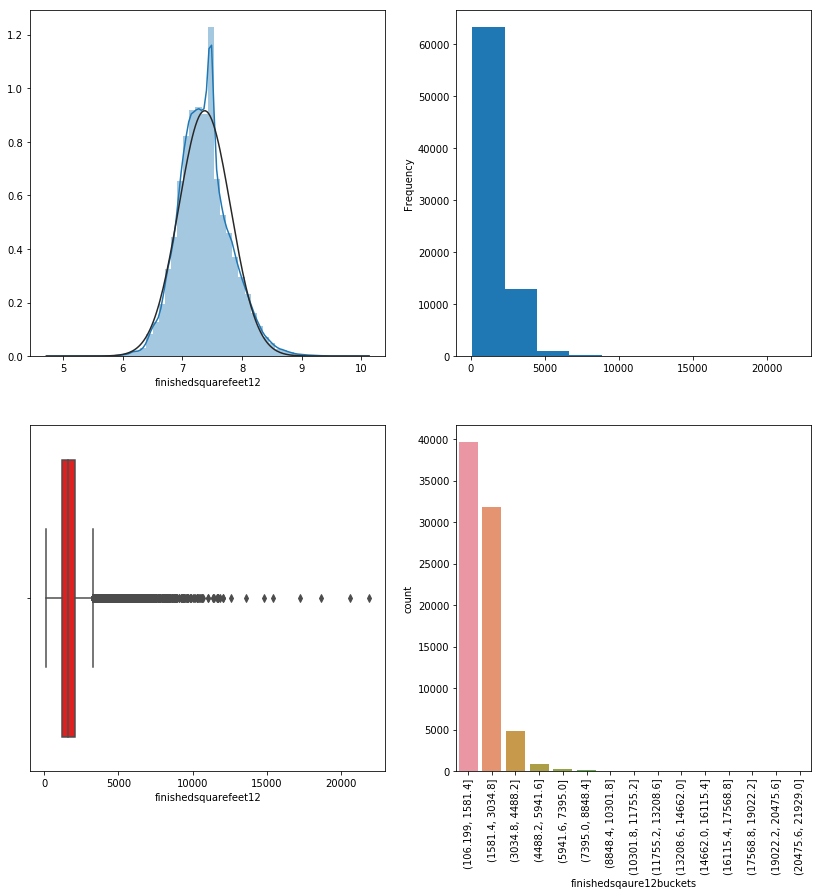

In [0]:
df_numeric['finishedsqaure12buckets'] = pd.cut(df_with_valid_features.finishedsquarefeet12, 15)
from scipy.stats import norm
fig, ax = plt.subplots(2,2, figsize=(14, 14))
sns.distplot(np.log(df_numeric.finishedsquarefeet12), fit = norm, ax = ax[0][0])
df_numeric.finishedsquarefeet12.plot('hist',  ax = ax[0][1])
sns.boxplot(df_numeric.finishedsquarefeet12, ax = ax[1][0], color='red')
sns.countplot(df_numeric.finishedsqaure12buckets, ax = ax[1][1])
plt.xticks(rotation=90)


### TimeSeries

> Indented block



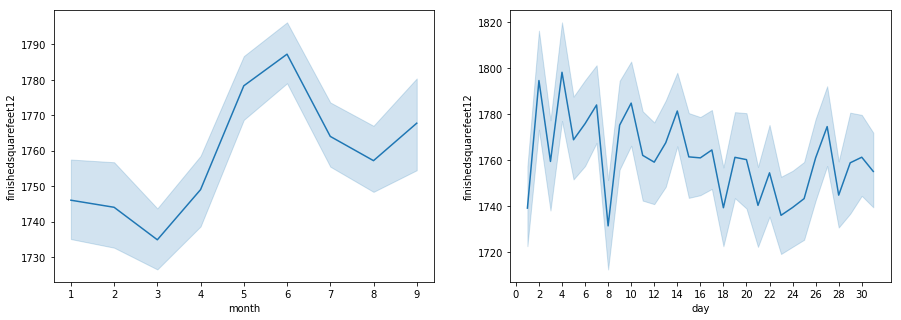

In [0]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.lineplot('month', 'finishedsquarefeet12', data = df_with_valid_features, ax = ax[0], ci=68)
sns.lineplot('day', 'finishedsquarefeet12', data = df_with_valid_features, ax = ax[1], ci=68)
ax[1].set_xticks(np.arange(0, 32, 2))

### calculatedbathnbr


In [0]:
df_numeric.calculatedbathnbr = df_with_valid_features.calculatedbathnbr

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

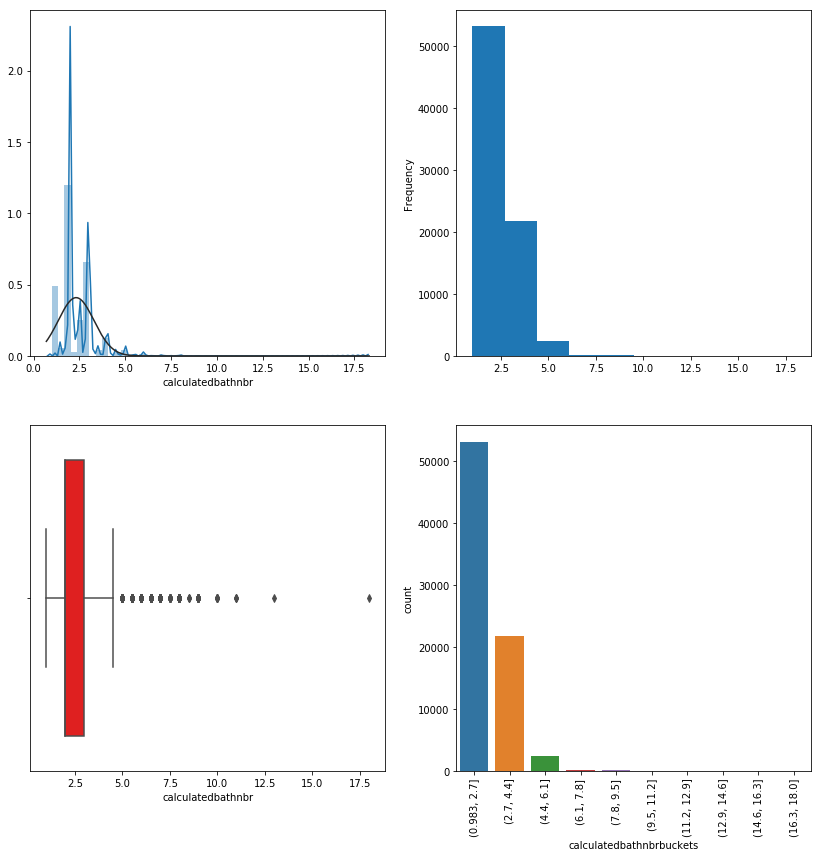

In [0]:
df_numeric['calculatedbathnbrbuckets'] = pd.cut(df_with_valid_features.calculatedbathnbr, 10)

from scipy.stats import norm
fig, ax = plt.subplots(2,2, figsize=(14, 14))
sns.distplot(df_numeric.calculatedbathnbr, fit = norm, ax = ax[0][0])
df_numeric.calculatedbathnbr.plot('hist',  ax = ax[0][1])
sns.boxplot(df_numeric.calculatedbathnbr, ax = ax[1][0], color='red')
sns.countplot(df_numeric.calculatedbathnbrbuckets, ax = ax[1][1])

plt.xticks(rotation=90)

In [0]:
df_numeric['calculatedbathnbr'].skew()
df_numeric['calculatedbathnbr'].kurtosis()

5.541733604455478

# Bivariate Analysis

## finshedsquarefeet12

In [0]:
df_with_valid_features.head()

,poolcnt,numberofstories,airconditioningtypeid,garagetotalsqft,garagecarcnt,regionidneighborhood,heatingorsystemtypeid,buildingqualitytypeid,propertyzoningdesc,unitcnt,...,roomcnt,regionidcounty,rawcensustractandblock,propertylandusetypeid,propertycountylandusecode,longitude,transactiondate,logerror,parcelid,buckets
0,1.0,1.434286,1.812013,633.000000,2.000000,187725.110544,3.921749,6.533779,LAR1,1.110309,...,0.0,1286.0,6.059063e+07,261.0,122,-117869207.0,2017-01-01,0.025595,14297519,"(-0.688, 1.296]"
1,1.0,1.000000,1.812013,0.000000,1.000000,187725.110544,3.921749,6.533779,LAR1,1.110309,...,5.0,2061.0,6.111001e+07,261.0,1110,-119281531.0,2017-01-01,0.055619,17052889,"(-0.688, 1.296]"
2,1.0,1.000000,1.812013,440.000000,2.000000,187725.110544,3.921749,6.533779,LAR1,1.110309,...,6.0,1286.0,6.059022e+07,261.0,122,-117823170.0,2017-01-01,0.005383,14186244,"(-0.688, 1.296]"
3,1.0,1.434286,1.812013,350.047061,1.815282,187725.110544,2.000000,8.000000,LCR110000*,1.000000,...,0.0,3101.0,6.037300e+07,261.0,0101,-118240722.0,2017-01-01,-0.103410,12177905,"(-0.688, 1.296]"
4,1.0,1.434286,1.000000,350.047061,1.815282,268548.000000,2.000000,8.000000,LAR3,1.000000,...,0.0,3101.0,6.037124e+07,266.0,010C,-118414640.0,2017-01-01,0.006940,10887214,"(-0.688, 1.296]"


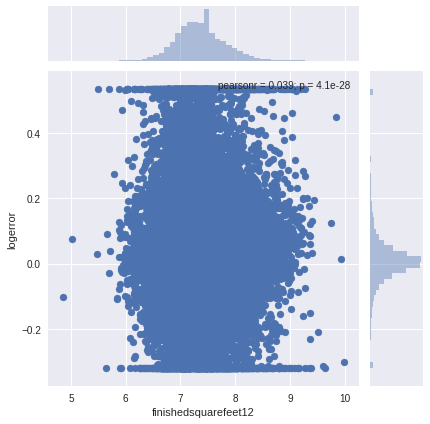

In [0]:
sns.jointplot(np.log(df_with_valid_features.finishedsquarefeet12), df_with_valid_features.logerror )